# Downstream task: Segmentation
Assessing the model performance by downstream task 

## DICE coefficients

Initialize dependencies and function

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import scipy.ndimage
import scipy.stats
from medpy.metric import dc
from PIL import Image

In [2]:
# Code snippet from nnUNet
def compute_dice_scores(ref: str, pred: str):
    ref = sitk.GetArrayFromImage(sitk.ReadImage(ref))
    pred = sitk.GetArrayFromImage(sitk.ReadImage(pred))
    # sitk.Show(sitk.GetImageFromArray(ref))
    # sitk.Show(sitk.GetImageFromArray(pred))
    dsc = dc(ref, pred)
    geometric_mean = np.mean(dsc)
    return dsc

Compute the results

In [32]:
label_200 = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1919/segmentations/114514-1919_all_labels.nii.gz'
label_100 = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1920/segmentations/114514-1920_all_labels.nii.gz'
label_inbox = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1921/segmentations/114514-1921_all_labels.nii.gz'
label_hyperfine = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1922/segmentations/114514-1922_all_labels.nii.gz'
label_src = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1923/segmentations/114514-1923_all_labels.nii.gz'
label_hires = '/home/viscent/hdd/viscent/SynthSR/result/pipeline/workdir/114514-1924/segmentations/114514-1924_all_labels.nii.gz'

dsc_200_100 = compute_dice_scores(label_200, label_100)
dsc_200_inbox = compute_dice_scores(label_200, label_inbox)
dsc_200_hyperfine = compute_dice_scores(label_200, label_hyperfine)
dsc_200_src = compute_dice_scores(label_200, label_src)
# dsc_200_hires = compute_dice_scores(label_200, label_hires)

dsc_100_inbox = compute_dice_scores(label_100, label_inbox)
dsc_100_hyperfine = compute_dice_scores(label_100, label_hyperfine)
dsc_100_src = compute_dice_scores(label_100, label_src)
# dsc_100_hires = compute_dice_scores(label_100, label_hires)

dsc_inbox_hyperfine = compute_dice_scores(label_inbox, label_hyperfine)
dsc_inbox_src = compute_dice_scores(label_inbox, label_src)
# dsc_inbox_hires = compute_dice_scores(label_inbox, label_hires)

dsc_hyperfine_src = compute_dice_scores(label_hyperfine, label_src)
# dsc_hyperfine_hires = compute_dice_scores(label_hyperfine, label_hires)

# dsc_src_hires = compute_dice_scores(label_src, label_hires)

dsc_matrix = np.zeros((6,6))
np.fill_diagonal(dsc_matrix, 1)
dsc_matrix[0,1] = dsc_200_100
dsc_matrix[1,0] = dsc_200_100
dsc_matrix[0,2] = dsc_200_inbox
dsc_matrix[2,0] = dsc_200_inbox
dsc_matrix[0,3] = dsc_200_hyperfine
dsc_matrix[3,0] = dsc_200_hyperfine
dsc_matrix[0,4] = dsc_200_src
dsc_matrix[4,0] = dsc_200_src
# dsc_matrix[0,5] = dsc_200_hires
# dsc_matrix[5,0] = dsc_200_hires
dsc_matrix[1,2] = dsc_100_inbox
dsc_matrix[2,1] = dsc_100_inbox
dsc_matrix[1,3] = dsc_100_hyperfine
dsc_matrix[3,1] = dsc_100_hyperfine
dsc_matrix[1,4] = dsc_100_src
dsc_matrix[4,1] = dsc_100_src
# dsc_matrix[1,5] = dsc_100_hires
# dsc_matrix[5,1] = dsc_100_hires
dsc_matrix[2,3] = dsc_inbox_hyperfine
dsc_matrix[3,2] = dsc_inbox_hyperfine
dsc_matrix[2,4] = dsc_inbox_src
dsc_matrix[4,2] = dsc_inbox_src
# dsc_matrix[2,5] = dsc_inbox_hires
# dsc_matrix[5,2] = dsc_inbox_hires
dsc_matrix[3,4] = dsc_hyperfine_src
dsc_matrix[4,3] = dsc_hyperfine_src
# dsc_matrix[3,5] = dsc_hyperfine_hires
# dsc_matrix[5,3] = dsc_hyperfine_hires
# dsc_matrix[4,5] = dsc_src_hires
# dsc_matrix[5,4] = dsc_src_hires



dsc_200_100: 0.8534935626569092
dsc_200_inbox: 0.6035347162320467
dsc_200_hyperfine: 0.9476667004323789
dsc_100_inbox: 0.6833441253454204
dsc_100_hyperfine: 0.8408303972324146
dsc_inbox_hyperfine: 0.5943440372888226
dsc_inbox_src: 0.6974111840347442
dsc_hyperfine_src: 0.792095087163233


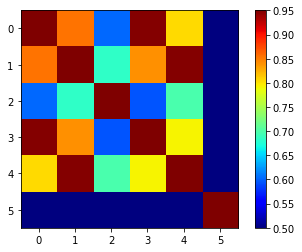

In [33]:
print(f"dsc_200_100: {dsc_200_100}")
print(f"dsc_200_inbox: {dsc_200_inbox}")
print(f"dsc_200_hyperfine: {dsc_200_hyperfine}")
print(f"dsc_100_inbox: {dsc_100_inbox}")
print(f"dsc_100_hyperfine: {dsc_100_hyperfine}")
print(f"dsc_inbox_hyperfine: {dsc_inbox_hyperfine}")
print(f"dsc_inbox_src: {dsc_inbox_src}")
print(f"dsc_hyperfine_src: {dsc_hyperfine_src}")
# dsc_matrix=np.where(dsc_matrix==0,1,dsc_matrix)
min_mat = np.min(np.where(dsc_matrix==0,1,dsc_matrix))
dsc_matrix=np.where(dsc_matrix==0,0.5,dsc_matrix)
dsc_matrix=np.where(dsc_matrix==1,0.95,dsc_matrix)
# dsc_matrix=np.where(dsc_matrix==1,0,dsc_matrix)
plt.imshow(dsc_matrix, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()